# WiseBanyan效率前緣

#### 1. 匯入Robo Adivisor資產池

In [2]:
import pandas as pd
import numpy as np
import scipy.optimize as sco
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime

In [3]:
data = pd.DataFrame()
tickers = ['VTI','SCHB','SPY','VEA','SCHF','EFA','VWO','IEMG','EEM','LQD',
          'VCIT','VCSH','SJNK','HYS','SHYG','VGIT','TIP','VGSH','VNQ',
          'IYR','ICF']
q = len(tickers)
records = 0
for i in tickers:
    tmp = web.DataReader(i, 'yahoo', '4/1/2015', datetime.date.today())
    data[i] = tmp['Adj Close']
    if records == 0:
        records = len(tmp)
    else:
        records = min(records, len(tmp))


data.head()

,VTI,SCHB,SPY,VEA,SCHF,EFA,VWO,IEMG,EEM,LQD,...,VCSH,SJNK,HYS,SHYG,VGIT,TIP,VGSH,VNQ,IYR,ICF
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-31,97.390610,45.798809,186.802124,34.281384,26.504255,55.472553,35.533504,42.452812,35.881935,102.635757,...,71.038963,21.857084,79.003578,37.233822,59.550022,104.299110,56.953491,68.215141,65.815201,85.670471
2015-04-01,97.209015,45.644566,186.141541,34.522369,26.662069,55.870205,36.011684,43.041336,36.329014,102.930870,...,71.202187,21.866112,79.089203,37.246014,59.688545,105.107117,57.018791,68.118073,65.806892,85.340065
2015-04-02,97.517754,45.798809,186.811188,34.780582,26.890026,56.354305,36.568111,43.612289,36.874439,102.761749,...,71.157852,21.873627,79.143669,37.246014,59.606518,104.721481,56.981472,68.635880,66.246666,86.051682
2015-04-06,98.189728,46.089138,188.069000,35.116238,27.170584,56.924850,37.011520,44.192036,37.348339,102.897026,...,71.202187,21.903708,79.314903,37.291721,59.734116,105.134682,57.046772,69.347893,66.910454,86.983521
2015-04-07,97.862808,45.962112,187.571274,35.116238,27.153049,56.847057,36.924583,43.972435,37.160561,103.269104,...,71.237686,21.956341,79.400505,37.314579,59.752346,105.364227,57.009464,68.126167,65.823494,85.517982


#### 2. 計算各檔ETF的年化報酬與共變數

In [4]:
returns = np.log(data / data.shift(1))
returns.head()

,VTI,SCHB,SPY,VEA,SCHF,EFA,VWO,IEMG,EEM,LQD,...,VCSH,SJNK,HYS,SHYG,VGIT,TIP,VGSH,VNQ,IYR,ICF
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-01,-0.001866,-0.003374,-0.003543,0.007005,0.005937,0.007143,0.013367,0.013768,0.012383,0.002871,...,0.002295,0.000413,0.001083,0.000327,0.002323,0.007717,0.001146,-0.001424,-0.000126,-0.003864
2015-04-02,0.003171,0.003374,0.003591,0.007452,0.008514,0.008627,0.015333,0.013178,0.014902,-0.001644,...,-0.000623,0.000344,0.000688,0.000000,-0.001375,-0.003676,-0.000655,0.007573,0.006661,0.008304
2015-04-06,0.006867,0.006319,0.006711,0.009604,0.010379,0.010073,0.012053,0.013206,0.012770,0.001316,...,0.000623,0.001374,0.002161,0.001226,0.002138,0.003938,0.001145,0.010320,0.009970,0.010771
2015-04-07,-0.003335,-0.002760,-0.002650,0.000000,-0.000646,-0.001368,-0.002352,-0.004982,-0.005040,0.003610,...,0.000498,0.002400,0.001079,0.000613,0.000305,0.002181,-0.000654,-0.017774,-0.016378,-0.016992


In [5]:
returns.cov()*252

,VTI,SCHB,SPY,VEA,SCHF,EFA,VWO,IEMG,EEM,LQD,...,VCSH,SJNK,HYS,SHYG,VGIT,TIP,VGSH,VNQ,IYR,ICF
VTI,0.034848,0.035086,0.034280,0.030593,0.030255,0.030203,0.032901,0.033817,0.034267,0.003209,...,0.001519,0.009822,0.010189,1.015544e-02,-0.003014,-1.092099e-03,-0.000897,0.030752,0.030327,0.029397
SCHB,0.035086,0.035399,0.034538,0.030762,0.030428,0.030373,0.033016,0.033948,0.034403,0.003186,...,0.001535,0.009884,0.010266,1.023207e-02,-0.003054,-1.142298e-03,-0.000908,0.031129,0.030665,0.029779
SPY,0.034280,0.034538,0.033904,0.030109,0.029780,0.029749,0.032407,0.033315,0.033747,0.003050,...,0.001461,0.009560,0.009901,9.903460e-03,-0.003002,-1.204454e-03,-0.000897,0.029940,0.029531,0.028737
VEA,0.030593,0.030762,0.030109,0.033402,0.032902,0.033069,0.034996,0.035994,0.036505,0.003617,...,0.001857,0.009365,0.009773,9.610233e-03,-0.002607,-3.371286e-04,-0.000761,0.026816,0.026563,0.025330
SCHF,0.030255,0.030428,0.029780,0.032902,0.032555,0.032642,0.034524,0.035518,0.036050,0.003586,...,0.001840,0.009269,0.009668,9.515354e-03,-0.002560,-3.149072e-04,-0.000749,0.026544,0.026303,0.025093
EFA,0.030203,0.030373,0.029749,0.033069,0.032642,0.032990,0.034288,0.035186,0.035699,0.003457,...,0.001782,0.009212,0.009615,9.458403e-03,-0.002618,-4.422454e-04,-0.000760,0.026313,0.026083,0.024877
VWO,0.032901,0.033016,0.032407,0.034996,0.034524,0.034288,0.046707,0.047279,0.048202,0.003561,...,0.002005,0.009731,0.010273,9.971666e-03,-0.002670,-6.847747e-05,-0.000788,0.028013,0.027806,0.026337
IEMG,0.033817,0.033948,0.033315,0.035994,0.035518,0.035186,0.047279,0.048537,0.049357,0.003687,...,0.002121,0.010028,0.010590,1.028525e-02,-0.002737,-1.274325e-04,-0.000801,0.028994,0.028749,0.027307
EEM,0.034267,0.034403,0.033747,0.036505,0.036050,0.035699,0.048202,0.049357,0.050482,0.003665,...,0.002064,0.010089,0.010650,1.034431e-02,-0.002774,-8.512581e-05,-0.000817,0.029139,0.028916,0.027420
LQD,0.003209,0.003186,0.003050,0.003617,0.003586,0.003457,0.003561,0.003687,0.003665,0.007183,...,0.002593,0.002388,0.002366,2.446828e-03,0.001521,2.600807e-03,0.000282,0.006582,0.006494,0.006127


In [6]:
annual_returns = returns.mean()*252
annual_returns

VTI     0.069498
SCHB    0.069101
SPY     0.078134
VEA    -0.001607
SCHF   -0.001777
EFA    -0.004060
VWO    -0.004028
IEMG   -0.002721
EEM    -0.003669
LQD     0.046506
VCIT    0.039427
VCSH    0.026181
SJNK    0.022343
HYS     0.022732
SHYG    0.025286
VGIT    0.033361
TIP     0.032023
VGSH    0.017690
VNQ     0.020333
IYR     0.027472
ICF     0.028968
dtype: float64

#### 3. 隨機分配資產初始權重

In [7]:
weights = np.random.random(q)
weights /= np.sum(weights)
weights

array([0.00526805, 0.04390957, 0.03736483, 0.0411004 , 0.05025051,
       0.01463689, 0.08422845, 0.02624051, 0.04872771, 0.04389154,
       0.03458279, 0.08021896, 0.05595394, 0.01309561, 0.0807878 ,
       0.05206278, 0.08669662, 0.00496488, 0.03706578, 0.08791023,
       0.07104216])

#### 4. 計算預期組合年化Return、Var、std

In [8]:
np.sum(returns.mean()*weights)*252

0.024438700859932955

In [9]:
np.dot(weights.T, np.dot(returns.cov()*252, weights))

0.0124383297211452

In [10]:
np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))

0.11152725999120215

#### 5. 模擬隨機組合（略）

#### 6. 投資組合優化_1（Max Sharpe）

In [11]:
def statistics(weights):
    weights = np.array(weights)
    port_return = np.sum(returns.mean()*weights)*252
    port_variance = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))
    return np.array([port_return, port_variance, port_return/port_variance])

# 最小化Sharpe的負值
def min_sharpe(weights):
    return -statistics(weights)[2]

In [12]:
# 限制權重總和為1
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
# 限制權重範圍在0和1之間
bnds = tuple((0,1) for x in range(q))
# 優化起始參數值(x0)
opts = sco.minimize(min_sharpe, q*[1./q,], method='SLSQP', bounds=bnds, constraints=cons)

opts

     fun: -1.9703742972469505
     jac: array([ 1.12234512e+00,  1.13962509e+00,  3.24010849e-03,  7.67610408e+00,
        7.67771238e+00,  7.66763256e+00,  9.04962128e+00,  9.33163895e+00,
        9.44022396e+00,  2.81325366e+00,  1.65460792e+00,  1.53957456e-01,
        8.10671657e-01,  7.75110111e-01,  6.33703381e-01,  7.85085708e-01,
        2.00153781e+00, -1.25423074e-04,  1.33894007e+01,  1.23613931e+01,
        1.23347507e+01])
 message: 'Optimization terminated successfully.'
    nfev: 277
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([0.00000000e+00, 0.00000000e+00, 3.73062703e-02, 1.93974865e-10,
       1.93330358e-10, 1.93558690e-10, 2.01429999e-10, 2.03644342e-10,
       2.05071421e-10, 3.79979173e-09, 4.00779479e-09, 0.00000000e+00,
       1.28054620e-10, 1.28691614e-10, 1.27746725e-10, 0.00000000e+00,
       3.53741212e-09, 9.62693739e-01, 2.06427771e-10, 2.01469183e-10,
       1.98034945e-10])

In [13]:
# 最優組合的權重向量
opts['x'].round(3)

array([0.   , 0.   , 0.037, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.963,
       0.   , 0.   , 0.   ])

In [14]:
#Tangency portfolio 的預期收益率、預期波動率、最大Sharpe
statistics(opts['x'].round(3))

array([0.01992689, 0.01011341, 1.97034385])

#### 7. 投資組合優化_2（Mean-Variance portfolio)

In [15]:
def min_variance(weights):
    return statistics(weights)[1]

optv = sco.minimize(min_variance, q*[1./q,], method='SLSQP',bounds=bnds, constraints=cons)

optv

     fun: 0.009969016635153018
     jac: array([0.01134823, 0.01100302, 0.01004581, 0.01374159, 0.01394447,
       0.01268066, 0.01731999, 0.01872635, 0.01832484, 0.03802873,
       0.02915546, 0.01398514, 0.01007938, 0.01029094, 0.01017326,
       0.02420134, 0.02856996, 0.00996293, 0.05650502, 0.05525689,
       0.05629248])
 message: 'Optimization terminated successfully.'
    nfev: 276
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([0.00000000e+00, 0.00000000e+00, 2.41932989e-02, 0.00000000e+00,
       1.07539757e-17, 1.13168252e-17, 1.00700466e-17, 0.00000000e+00,
       1.38836202e-18, 7.17097998e-18, 0.00000000e+00, 0.00000000e+00,
       2.89537600e-03, 1.11881394e-02, 3.55207235e-04, 1.44601527e-16,
       0.00000000e+00, 9.61367978e-01, 0.00000000e+00, 3.22775624e-17,
       0.00000000e+00])

In [16]:
# MVP 的預期收益率、預期波動率、最大Sharpe
statistics(optv['x']).round(3)

array([0.019, 0.01 , 1.929])

#### 8. 組合的有效前緣

In [17]:
# 在不同目標收益率(target_returns)水平循環時，最小化的約束條件會變化
target_returns = np.linspace(statistics(optv['x'])[0], annual_returns.max(), 50)
target_variance = []

for tar in target_returns:
    cons = ({'type':'eq', 'fun': lambda x: statistics(x)[0]-tar},
           {'type':'eq', 'fun': lambda x: np.sum(x) - 1})
    res = sco.minimize(min_variance, q*[1./q,], method='SLSQP', bounds=bnds, constraints=cons)
    target_variance.append(res['fun'])

target_variance = np.array(target_variance)

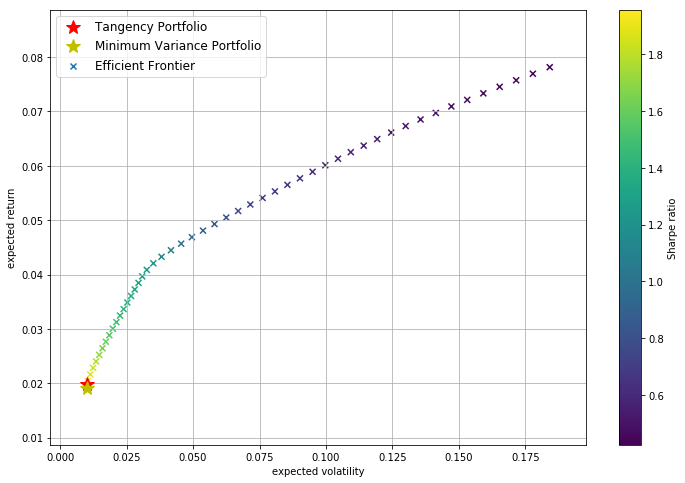

In [37]:
plt.figure(figsize=(12,8))
#圈圈：模擬點
#plt.scatter(port_variance, port_returns, c=port_returns/port_variance, marker='o')
# 叉號：有效前緣
plt.scatter(target_variance, target_returns, c=target_returns/target_variance, marker='x', label='Efficient Frontier')
#紅星：最高Sharpe
plt.plot(statistics(opts['x'])[1],statistics(opts['x'])[0],'r*', markersize=15.0, label='Tangency Portfolio')
#黃星：MVP
plt.plot(statistics(optv['x'])[1],statistics(optv['x'])[0],'y*', markersize=15.0, label='Minimum Variance Portfolio')

plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend(loc='upper left', fontsize=12)
plt.colorbar(label='Sharpe ratio')
plt.title("WiseBanyan's Efficient Frontier")
plt.show()

In [19]:
ret_var = np.vstack((target_returns, target_variance))
np.savetxt("WiseBanyan.csv", ret_var, delimiter=",")

#### 9. 加入新一檔ETF

- try: VUG, IVW, IUSG, VOT, SCHG, IJK, AMCPX,  VPMCX, QQQ
- fail: VOT, IJK(都沒惡化但程度太小), AMCPX
- success: SCHG, VPMCX, QQQ  

In [196]:
add_etf = web.DataReader('QQQ', 'yahoo', '4/1/2015', datetime.date.today())
data['QQQ'] = add_etf['Adj Close']
new_q = len(data.columns)

data.head()

,VTI,SCHB,SPY,VEA,SCHF,EFA,VWO,IEMG,EEM,LQD,...,SJNK,HYS,SHYG,VGIT,TIP,VGSH,VNQ,IYR,ICF,QQQ
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-31,97.390610,45.798809,186.802124,34.281384,26.504255,55.472553,35.533504,42.452812,35.881935,102.635757,...,21.857084,79.003578,37.233822,59.550022,104.299110,56.953491,68.215141,65.815201,85.670471,100.784111
2015-04-01,97.209015,45.644566,186.141541,34.522369,26.662069,55.870205,36.011684,43.041336,36.329014,102.930870,...,21.866112,79.089203,37.246014,59.688545,105.107117,57.018791,68.118073,65.806892,85.340065,100.259209
2015-04-02,97.517754,45.798809,186.811188,34.780582,26.890026,56.354305,36.568111,43.612289,36.874439,102.761749,...,21.873627,79.143669,37.246014,59.606518,104.721481,56.981472,68.635880,66.246666,86.051682,100.326019
2015-04-06,98.189728,46.089138,188.069000,35.116238,27.170584,56.924850,37.011520,44.192036,37.348339,102.897026,...,21.903708,79.314903,37.291721,59.734116,105.134682,57.046772,69.347893,66.910454,86.983521,101.146805
2015-04-07,97.862808,45.962112,187.571274,35.116238,27.153049,56.847057,36.924583,43.972435,37.160561,103.269104,...,21.956341,79.400505,37.314579,59.752346,105.364227,57.009464,68.126167,65.823494,85.517982,100.975021


In [197]:
new_returns = np.log(data / data.shift(1))
new_returns.head()

,VTI,SCHB,SPY,VEA,SCHF,EFA,VWO,IEMG,EEM,LQD,...,SJNK,HYS,SHYG,VGIT,TIP,VGSH,VNQ,IYR,ICF,QQQ
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-01,-0.001866,-0.003374,-0.003543,0.007005,0.005937,0.007143,0.013367,0.013768,0.012383,0.002871,...,0.000413,0.001083,0.000327,0.002323,0.007717,0.001146,-0.001424,-0.000126,-0.003864,-0.005222
2015-04-02,0.003171,0.003374,0.003591,0.007452,0.008514,0.008627,0.015333,0.013178,0.014902,-0.001644,...,0.000344,0.000688,0.000000,-0.001375,-0.003676,-0.000655,0.007573,0.006661,0.008304,0.000666
2015-04-06,0.006867,0.006319,0.006711,0.009604,0.010379,0.010073,0.012053,0.013206,0.012770,0.001316,...,0.001374,0.002161,0.001226,0.002138,0.003938,0.001145,0.010320,0.009970,0.010771,0.008148
2015-04-07,-0.003335,-0.002760,-0.002650,0.000000,-0.000646,-0.001368,-0.002352,-0.004982,-0.005040,0.003610,...,0.002400,0.001079,0.000613,0.000305,0.002181,-0.000654,-0.017774,-0.016378,-0.016992,-0.001700


In [198]:
new_annual_returns = new_returns.mean()*252
new_annual_returns

VTI     0.069498
SCHB    0.069101
SPY     0.078134
VEA    -0.001607
SCHF   -0.001777
EFA    -0.004060
VWO    -0.004028
IEMG   -0.002721
EEM    -0.003669
LQD     0.046506
VCIT    0.039427
VCSH    0.026181
SJNK    0.022343
HYS     0.022732
SHYG    0.025286
VGIT    0.033361
TIP     0.032023
VGSH    0.017690
VNQ     0.020333
IYR     0.027472
ICF     0.028968
QQQ     0.145585
dtype: float64

In [199]:
new_weights = np.random.random(new_q)
new_weights /= np.sum(new_weights)
new_weights

array([0.02660917, 0.02251759, 0.08777822, 0.00845229, 0.02997477,
       0.10069616, 0.07743545, 0.0197695 , 0.05061574, 0.0765786 ,
       0.00567547, 0.03841524, 0.04333456, 0.09985205, 0.06651512,
       0.02079604, 0.01929651, 0.03564351, 0.02638274, 0.00068293,
       0.07218472, 0.07079359])

#### New Tangency Portfolio

In [200]:
def new_statistics(new_weights):
    new_weights = np.array(new_weights)
    port_return = np.sum(new_returns.mean()*new_weights)*252
    port_variance = np.sqrt(np.dot(new_weights.T, np.dot(new_returns.cov()*252, new_weights)))
    return np.array([port_return, port_variance, port_return/port_variance])

# 最小化Sharpe的負值
def new_min_sharpe(new_weights):
    return -new_statistics(new_weights)[2]

# 限制權重總和為1
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
# 限制權重範圍在0和1之間
new_bnds = tuple((0,1) for x in range(new_q))
# 優化起始參數值(x0)
new_opts = sco.minimize(new_min_sharpe, new_q*[1./new_q,], method='SLSQP', bounds=new_bnds, constraints=cons)

new_opts

     fun: -2.12877761672023
     jac: array([ 3.20156327e+00,  3.25185823e+00,  2.19942251e+00,  8.89700690e+00,
        8.83860722e+00,  8.87467751e+00,  1.14585020e+01,  1.18344973e+01,
        1.20201956e+01,  2.67408574e+00,  1.60239902e+00,  1.74352705e-01,
        7.65143186e-01,  8.05651993e-01,  6.68144792e-01,  7.54427761e-01,
        1.98845676e+00,  3.21269035e-04,  1.29359551e+01,  1.19838822e+01,
        1.18989856e+01, -8.33991170e-03])
 message: 'Optimization terminated successfully.'
    nfev: 289
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([8.63288845e-12, 8.77479777e-12, 7.90921919e-11, 1.02765295e-11,
       1.01230921e-11, 1.01716076e-11, 1.28704562e-11, 1.34263940e-11,
       1.36524060e-11, 5.70690705e-11, 6.53222216e-11, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.49175603e-11, 9.62934607e-01, 1.20070733e-11, 1.13575515e-11,
       1.10436483e-11, 3.70653933e-02])

In [201]:
# new tangency portfolio的權重向量
new_opts['x'].round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.963,
       0.   , 0.   , 0.   , 0.037])

In [202]:
# new Tangency portfolio 的預期收益率、預期波動率、最大Sharpe
new_statistics(new_opts['x'].round(3))

array([0.02242258, 0.01053309, 2.12877526])

#### New Minimum Variance Portfolio

In [203]:
def new_min_variance(new_weights):
    return new_statistics(new_weights)[1]

new_optv = sco.minimize(new_min_variance, new_q*[1./new_q,], method='SLSQP', bounds=new_bnds, constraints=cons)

new_optv

     fun: 0.009966327364281593
     jac: array([0.01189727, 0.01157617, 0.01065726, 0.01399377, 0.01415537,
       0.01293596, 0.01851061, 0.01997047, 0.01961794, 0.0377514 ,
       0.02902141, 0.01393065, 0.00974935, 0.01023297, 0.00991436,
       0.02418011, 0.02854738, 0.00993998, 0.0553935 , 0.05419982,
       0.05518675, 0.01152747])
 message: 'Optimization terminated successfully.'
    nfev: 312
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([0.00000000e+00, 0.00000000e+00, 1.80211151e-02, 1.84537852e-18,
       7.19577096e-18, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.15736838e-16, 7.64226690e-17, 0.00000000e+00,
       0.00000000e+00, 1.48077914e-02, 0.00000000e+00, 5.55980834e-17,
       0.00000000e+00, 9.61447819e-01, 6.48867712e-18, 0.00000000e+00,
       0.00000000e+00, 5.72327498e-03])

In [204]:
# new_MVP 的預期收益率、預期波動率、最大Sharpe
new_statistics(new_optv['x']).round(3)

array([0.02 , 0.01 , 1.965])

#### Minimum Variance Portfolio

In [205]:
def new_min_variance(new_weights):
    return new_statistics(new_weights)[1]

# 在不同目標收益率(target_returns)水平循環時，最小化的約束條件會變化
new_target_returns = np.linspace(new_statistics(new_optv['x'])[0], new_annual_returns.max(), 50)
new_target_variance = []
#cnt = 0

for tar in new_target_returns:
    #cnt+=1
    new_cons = ({'type':'eq', 'fun': lambda x: new_statistics(x)[0]-tar},
           {'type':'eq', 'fun': lambda x: np.sum(x) - 1})
    new_res = sco.minimize(new_min_variance, new_q*[1./new_q,], method='SLSQP', bounds=new_bnds, constraints=new_cons)
    new_target_variance.append(new_res['fun'])
    #print(cnt)

new_target_variance = np.array(new_target_variance)

In [1]:
#舊圖
plt.figure(figsize=(12,7))
# 叉號：有效前緣
plt.scatter(target_variance, target_returns, c=target_returns/target_variance, marker='x', label='Efficient Frontier')
#紅星：最高Sharpe
plt.plot(statistics(opts['x'])[1],statistics(opts['x'])[0],'r*', markersize=15.0, label='Tangency Portfolio')
#黃星：MVP
plt.plot(statistics(optv['x'])[1],statistics(optv['x'])[0],'y*', markersize=15.0, label='Minimum Variance Portfolio')


#新圖
# 叉號：有效前緣
plt.scatter(new_target_variance, new_target_returns, c=new_target_returns/new_target_variance, marker='^', label='New Efficient Frontier')
#紅星：最高Sharpe
plt.plot(new_statistics(new_opts['x'])[1],new_statistics(new_opts['x'])[0],'b*', markersize=15.0, label='New Tangency Portfolio')
#黃星：MVP
plt.plot(new_statistics(new_optv['x'])[1],new_statistics(new_optv['x'])[0],'g*', markersize=15.0, label='New Minimum Variance Portfolio')


plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend(loc='upper left', fontsize=10)
plt.colorbar(label='Sharpe ratio')
plt.title("WiseBanyan's Efficient Frontier: After")
plt.show()

print("Decrease in MVP volatility:", optv['fun']-new_optv['fun'])
print("Increase in tangency porfolio's sharpe ratio:",(-new_opts['fun'])-(-opts['fun']))

NameError: name 'plt' is not defined